In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import numpy as np
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt


# For time series analysis, we also need another module
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


### Read data 

In [2]:
data_file_name = 'C:\Users\sijop\Documents\Acads\Data Analytics Programming\Global Terrorism Database\globalterrorismdb_0718dist.csv'

In [3]:
gtd = pd.read_csv(data_file_name)

C:\Users\sijop\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
gtd.shape

(181691, 135)

### Attacks over the years

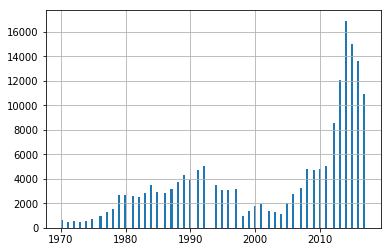

In [6]:
#attacks over the years! 
gtd['iyear'].hist(bins = 150)

-I see a gap(no terror atacks! )  between 1990 and 2000 

-The attacks have increased significantly after 2000. Is it because the data was easier to capture after this period? ! 

In [102]:
#missing values 

gtd.isnull().sum(axis = 0)
#lot of missing values@@.. 

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent_txt        117626
propvalue             142702
propcomment           123732
ishostkid     


# Time series try

# Success (1,0) over the years

C:\Users\sijop\Anaconda2\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x360 with 0 Axes>

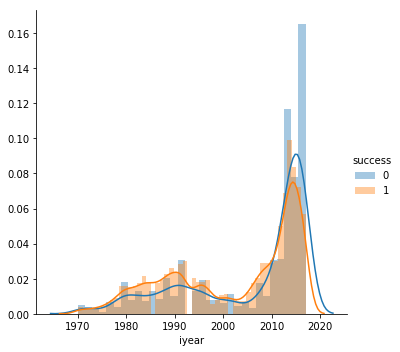

In [107]:

plt.figure(figsize=(15,5))
sns.FacetGrid(gtd, hue="success", size=5) \
   .map(sns.distplot, "iyear") \
   .add_legend();
plt.show();


### Distribution of months and days

Text(0.5,1,'Distribution of day')

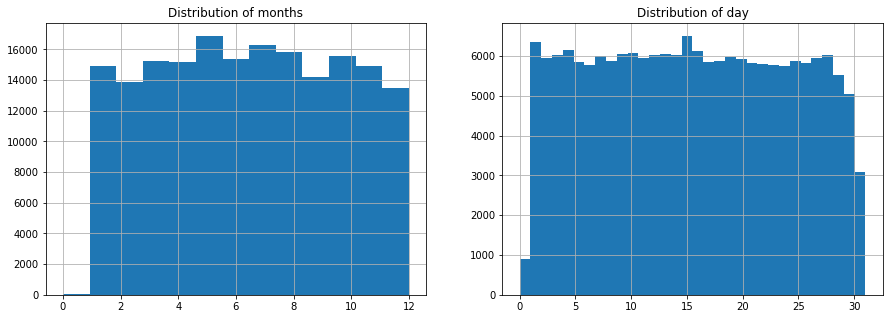

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
gtd['imonth'].hist(bins = 13)
plt.title('Distribution of months')
plt.subplot(1,2,2)
gtd['iday'].hist(bins = 32)
plt.title('Distribution of day')

- Uniform distribution over the days. The number of attacks are lower on 31st because not all months have 31 days

In [11]:
#country_txt

### Regions and countries affected

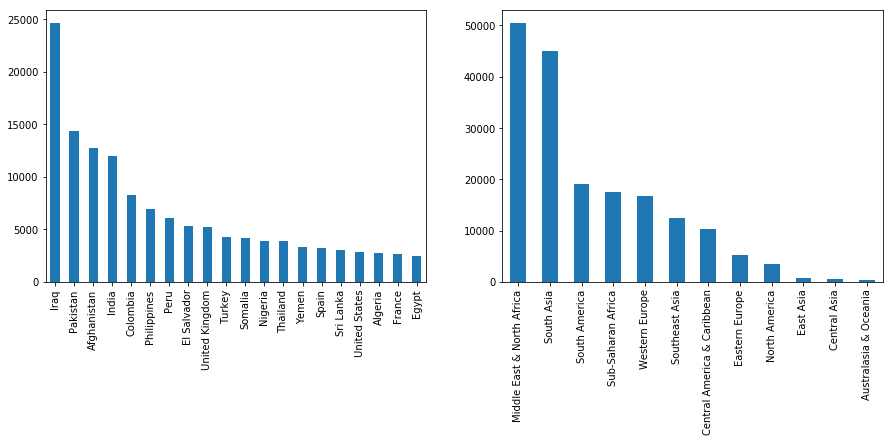

In [72]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
gtd.country_txt.value_counts()[:20].plot(kind = 'bar')
plt.subplot(1,2,2)
gtd.region_txt.value_counts()[:20].plot(kind = 'bar')

### Attack and target type

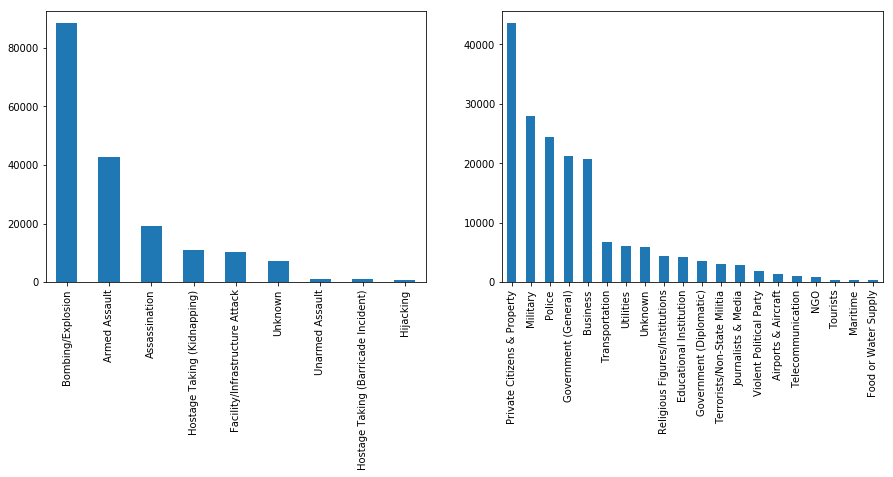

In [108]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
gtd.attacktype1_txt.value_counts()[:20].plot(kind = 'bar')
plt.subplot(1,2,2)
gtd.targtype1_txt.value_counts()[:20].plot(kind = 'bar')

### Activities by success over the years 

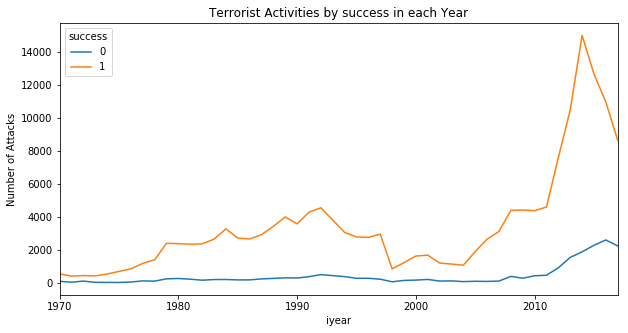

In [15]:
#
pd.crosstab(gtd.iyear, gtd.success).plot(kind='line',figsize=(10,5))
plt.title('Terrorist Activities by success in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Which countries have high success rates? 

In [16]:
num_attacks_per_country_df = gtd.groupby(['country_txt'])['country_txt'].size()
num_attacks_per_country_df = num_attacks_per_country_df[num_attacks_per_country_df>100]
atleast_100_attacks = num_attacks_per_country_df.index

In [17]:
success_rates_per_country_df =gtd[gtd.country_txt.isin(atleast_100_attacks)].groupby(['country_txt'])['success'].mean()

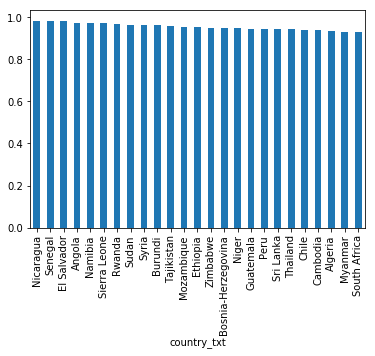

In [18]:
success_rates_per_country_df.sort_values(ascending =False)[:25].plot(kind='bar')
#plt.pcolor(gtd)
#plt.yticks(np.arange(0.5, len(gtd.country_txt), 1), gtd.country_txt)
#plt.xticks(np.arange(0.5, len(gtd.iyear), 1), gtd.iyear)
#plt.show()

- High success rates in a lot of countries. What types of attacks are successful? 


### Attacks by success rates

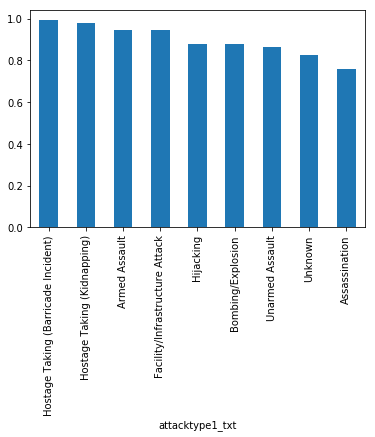

In [19]:
gtd.groupby(['attacktype1_txt'])['success'].mean().sort_values(ascending = False)[:20].plot(kind='bar')

### Weapons and groups TOP 20 

In [48]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Date
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-01-01 00:00:00.000001970
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,1970-01-01 00:00:00.000001970
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-01-01 00:00:00.000001970
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosi

### Top 20 Groups and Weapons 

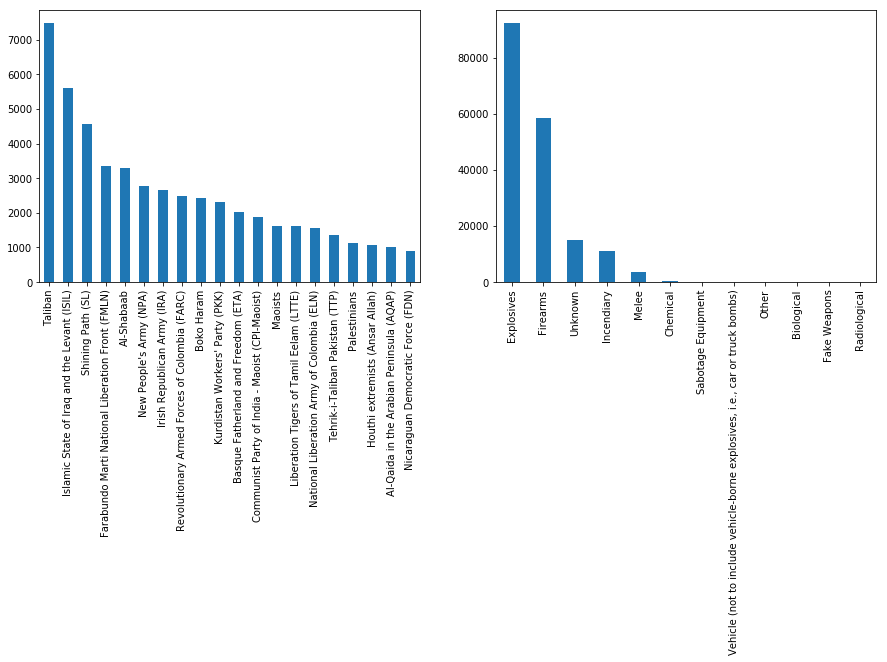

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
#most used weapons 
#lot of unknowns! Look at only known ones

gtd[gtd.gname != 'Unknown'].gname.value_counts().sort_values(ascending = False)[:20].plot(kind='bar')
plt.subplot(1,2,2)

gtd.weaptype1_txt.value_counts().sort_values(ascending = False)[:20].plot(kind='bar')

In [50]:
top_20_gnames_list = list(gtd.gname.value_counts().sort_values(ascending = False)[:20].index)
top_20_gnames_list.remove('Unknown')

In [51]:
print top_20_gnames_list

['Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab', "New People's Army (NPA)", 'Irish Republican Army (IRA)', 'Revolutionary Armed Forces of Colombia (FARC)', 'Boko Haram', "Kurdistan Workers' Party (PKK)", 'Basque Fatherland and Freedom (ETA)', 'Communist Party of India - Maoist (CPI-Maoist)', 'Maoists', 'Liberation Tigers of Tamil Eelam (LTTE)', 'National Liberation Army of Colombia (ELN)', 'Tehrik-i-Taliban Pakistan (TTP)', 'Palestinians', 'Houthi extremists (Ansar Allah)', 'Al-Qaida in the Arabian Peninsula (AQAP)']


### What are the most used weapons by each of the organizations?? 

In [52]:
gtd[gtd.gname.isin(top_20_gnames_list)].groupby(['gname'])['weaptype1_txt'].agg(lambda x:x.value_counts().index[0])

gname
Al-Qaida in the Arabian Peninsula (AQAP)            Explosives
Al-Shabaab                                          Explosives
Basque Fatherland and Freedom (ETA)                 Explosives
Boko Haram                                          Explosives
Communist Party of India - Maoist (CPI-Maoist)        Firearms
Farabundo Marti National Liberation Front (FMLN)      Firearms
Houthi extremists (Ansar Allah)                     Explosives
Irish Republican Army (IRA)                         Explosives
Islamic State of Iraq and the Levant (ISIL)         Explosives
Kurdistan Workers' Party (PKK)                        Firearms
Liberation Tigers of Tamil Eelam (LTTE)               Firearms
Maoists                                             Explosives
National Liberation Army of Colombia (ELN)          Explosives
New People's Army (NPA)                               Firearms
Palestinians                                        Explosives
Revolutionary Armed Forces of Colombia (FARC)    

In [57]:
#
top_20_gtd = gtd[gtd.gname.isin(top_20_gnames_list)]
top_20_gtd.head()
#
weapons_top_20_cross_tab =pd.crosstab(top_20_gtd['gname'], top_20_gtd['weapsubtype1_txt'])
weapons_top_20_cross_tab.head()

weapsubtype1_txt,Arson/Fire,Automatic or Semi-Automatic Rifle,Blunt Object,Dynamite/TNT,Explosive,Gasoline or Alcohol,Grenade,Handgun,"Hands, Feet, Fists",Knife or Other Sharp Object,Landmine,Letter Bomb,Molotov Cocktail/Petrol Bomb,Other Explosive Type,Other Gun Type,Pipe Bomb,Poisoning,Pressure Trigger,"Projectile (rockets, mortars, RPGs, etc.)",Remote Trigger,Rifle/Shotgun (non-automatic),Rope or Other Strangling Device,Sticky Bomb,Suffocation,Suicide (carried bodily by human being),Time Fuse,Unknown Explosive Type,Unknown Gun Type,Unknown Weapon Type,Vehicle
gname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Al-Qaida in the Arabian Peninsula (AQAP),6,54,1,3,0,0,27,3,0,7,10,3,0,11,0,0,0,0,92,12,1,0,3,0,26,2,116,361,0,160
Al-Shabaab,40,78,5,0,0,1,231,190,2,62,240,0,2,25,0,0,1,1,421,46,3,1,34,0,46,3,273,816,0,215
Basque Fatherland and Freedom (ETA),10,183,2,16,0,8,35,252,0,1,6,39,7,17,0,0,0,1,29,3,10,0,1,0,0,7,963,75,0,152
Boko Haram,167,114,0,5,1,4,23,2,1,33,26,0,6,36,0,0,0,0,116,5,11,1,0,0,388,7,343,866,0,85
Communist Party of India - Maoist (CPI-Maoist),249,15,12,51,0,22,3,7,17,109,176,0,0,119,4,3,1,5,5,3,6,2,0,1,0,0,199,651,3,2


In [55]:
#weapon_counts =top["weaptype1_txt"].value_counts()

In [56]:
#violation_per_boro = most_violations.apply(lambda x: x / violationFrequency)

In [ ]:
weapons_top_20_cross_tab

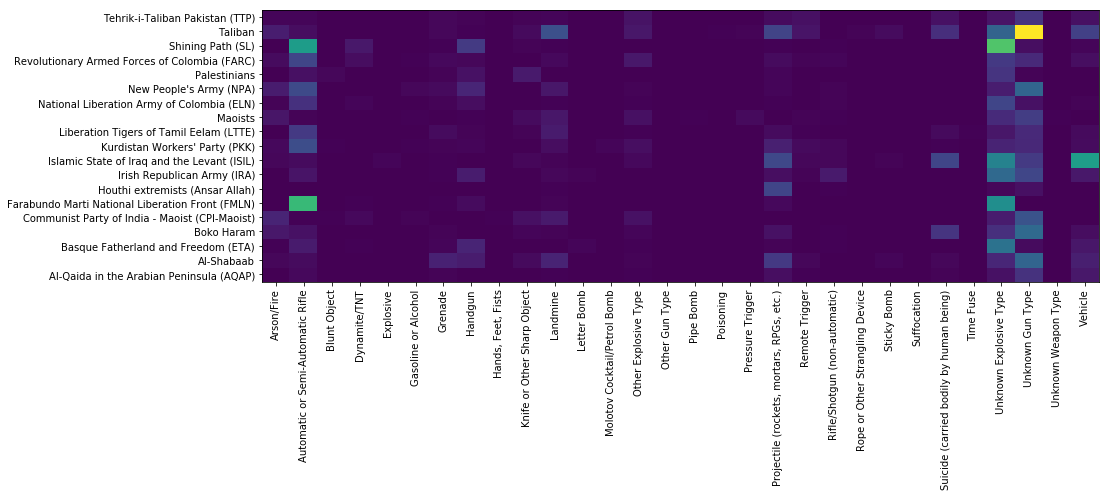

In [61]:
plt.figure(figsize=(15,5))
plt.pcolor(weapons_top_20_cross_tab)
plt.yticks(np.arange(0.5, len(weapons_top_20_cross_tab.index), 1), weapons_top_20_cross_tab.index)
plt.xticks(np.arange(0.5, len(weapons_top_20_cross_tab.columns), 1), weapons_top_20_cross_tab.columns,rotation=90)
plt.show()

In [64]:
weapons_year_top_20_cross_tab =pd.crosstab( top_20_gtd['weapsubtype1_txt'],top_20_gtd['iyear'])
weapons_year_top_20_cross_tab.head()

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
weapsubtype1_txt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arson/Fire,0,0,0,1,0,0,1,0,1,0,1,0,2,0,3,4,1,3,1,0,0,0,0,8,4,1,1,0,1,11,10,9,5,3,8,14,8,70,104,117,111,110,63,150,179,129,136
Automatic or Semi-Automatic Rifle,1,0,0,0,5,17,7,20,67,73,149,140,318,490,378,312,211,369,602,629,555,764,490,145,15,3,0,1,20,17,9,4,8,9,5,10,17,10,9,12,32,82,62,127,118,80,99
Blunt Object,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,1,3,30,18,0,1,1,1,3,1,1,0,0,0,0,0,0,4,2,7,9,1,3,2,2,4,2
Dynamite/TNT,0,0,0,0,0,0,0,0,5,2,6,17,8,48,31,8,28,11,0,0,1,35,3,1,3,8,0,2,3,23,5,16,6,2,2,0,0,13,14,28,21,5,7,6,9,8,7
Explosive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,14,16


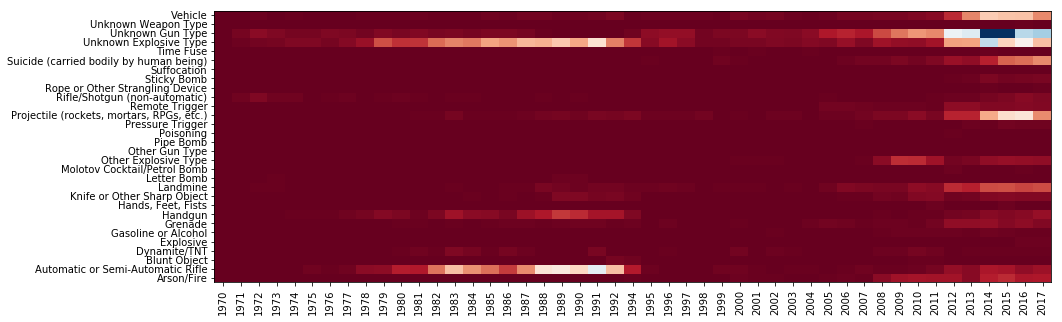

In [69]:
plt.figure(figsize=(15,5))
plt.pcolor(weapons_year_top_20_cross_tab,cmap='RdBu')
plt.yticks(np.arange(0.5, len(weapons_year_top_20_cross_tab.index), 1), weapons_year_top_20_cross_tab.index)
plt.xticks(np.arange(0.5, len(weapons_year_top_20_cross_tab.columns), 1), weapons_year_top_20_cross_tab.columns,rotation=90)

plt.show()

- What is going on during 2014 - 2016 ? 

In [75]:
#most u
weapons_year_top_20_cross_tab.idxmax()

iyear
1970                             Unknown Gun Type
1971                             Unknown Gun Type
1972                             Unknown Gun Type
1973                             Unknown Gun Type
1974                       Unknown Explosive Type
1975                       Unknown Explosive Type
1976                             Unknown Gun Type
1977                       Unknown Explosive Type
1978                       Unknown Explosive Type
1979                       Unknown Explosive Type
1980                       Unknown Explosive Type
1981                       Unknown Explosive Type
1982            Automatic or Semi-Automatic Rifle
1983            Automatic or Semi-Automatic Rifle
1984            Automatic or Semi-Automatic Rifle
1985                       Unknown Explosive Type
1986                       Unknown Explosive Type
1987                       Unknown Explosive Type
1988            Automatic or Semi-Automatic Rifle
1989            Automatic or Semi-Automatic 

### Success rates of these terror org

In [96]:
top_20_gtd.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Date
39,197001310001,1970,1,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Bamban,15.675051,120.331618,1.0,0,NaN,NaN,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,0,0,9,Unknown,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",U.S. Navy,Seaman,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New People's Army (NPA),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,1970-01-01 00:00:00.000001970


In [ ]:
gtd

In [99]:
top_20_gtd.groupby(['success'])['nkill','nwound'].mean()

,nkill,nwound
success,,
0,2.009726,0.975210
1,3.739665,3.323325


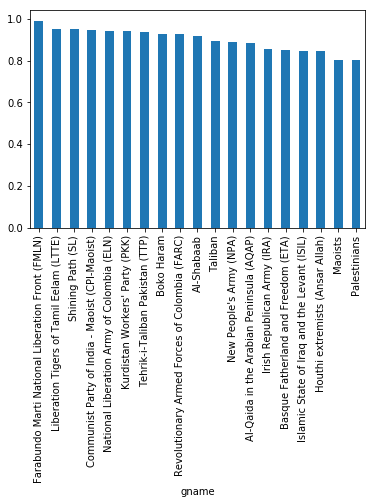

In [106]:
top_20_gtd.groupby(['gname'])['success'].mean().sort_values(ascending=False).plot(kind='bar')

In [103]:
#top_20_gtd

### Targets of these terror orgniaztions

In [115]:
pd.crosstab(top_20_gtd['gname'],top_20_gtd['target1']).T.idxmax()

gname
Al-Qaida in the Arabian Peninsula (AQAP)                                 Checkpoint
Al-Shabaab                                                                     Base
Basque Fatherland and Freedom (ETA)                                            Bank
Boko Haram                                                                  Village
Communist Party of India - Maoist (CPI-Maoist)                            Civilians
Farabundo Marti National Liberation Front (FMLN)                      Military Unit
Houthi extremists (Ansar Allah)                                            Soldiers
Irish Republican Army (IRA)                                                   Store
Islamic State of Iraq and the Levant (ISIL)                               Civilians
Kurdistan Workers' Party (PKK)                                                 Unit
Liberation Tigers of Tamil Eelam (LTTE)                                        Unit
Maoists                                                               

### Top targets over the years 

In [117]:
pd.crosstab(gtd['target1'],gtd['iyear']).idxmax()

iyear
1970                               Bank of America Branch
1971                                      Bank of America
1972                                          Foot Patrol
1973                                                 Bank
1974                                     department store
1975                                                 bank
1976    U.S. vehicles, personally owned by Navy personnel
1977                                                 Bank
1978                                                store
1979                                                 bank
1980                                                 Bank
1981                                        Military Unit
1982                                        Military Unit
1983                                        Military Unit
1984                                        Military Unit
1985                                        Military Unit
1986                                        Military Unit
1987    